## Fourier Series

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

## plot sum of sines

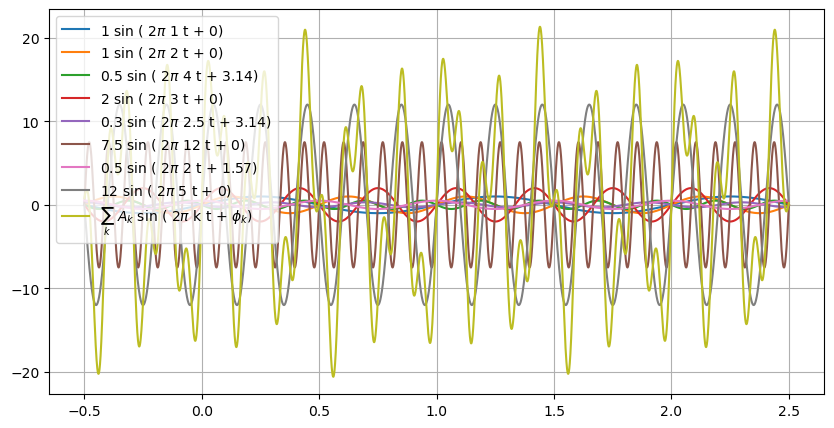

(441000,)

In [29]:

def sin2pi(a,f,p,x):
    return a * np.sin(2 * np.pi * f *x + p) 

def plot_sum_of_sines(Amplitudes, Freqs, Phases, Vals = 10000, show_all = False):
    plt.figure(figsize=(10,5))
    x = np.linspace(-0.5,2.5,Vals)
    sines = []
    for i in range(len(Amplitudes)):
        sines.append(sin2pi(Amplitudes[i],Freqs[i],Phases[i],x))
    if show_all:
        for i in range(len(Amplitudes)):
            plt.plot(x,sines[i] , label = f'{Amplitudes[i]} sin ( $2 \pi$ {Freqs[i]} t + {Phases[i]})')
    sines_sum = np.sum(np.array(sines), axis=0)
    plt.plot(x,sines_sum, label = f'$\sum_k$ $A_k$ sin ( $2 \pi$ k t + $\phi_k$)')
    
    plt.grid()
    plt.legend()
    plt.show()
    return sines_sum
pi = round(np.pi,2)
Amps = [1,1 ,0.5,   2, 0.3, 7.5 ,0.5, 12]
Freq = [1,2 ,4  ,   3, 2.5, 12  ,2,   5]
Phas = [0,0 ,pi, 0,pi,0,  pi/2,        0]

bitrate = 44100 * 10
sum_of_sines =plot_sum_of_sines(Amps, Freq, Phas,Vals=bitrate, show_all=True)
sum_of_sines.shape

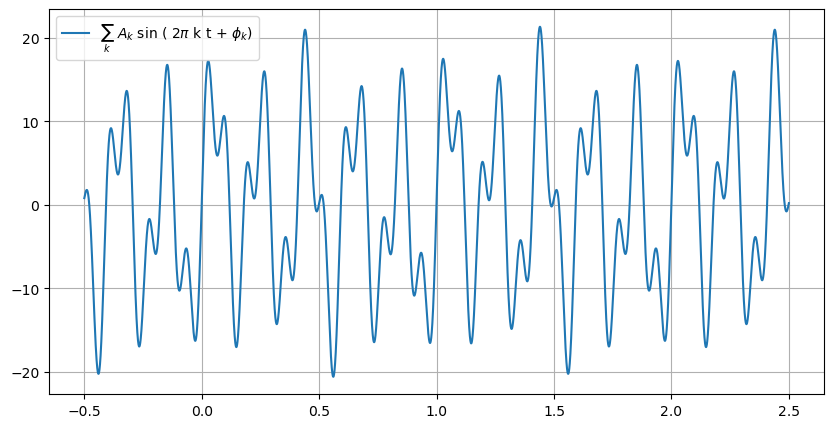

In [30]:
sum_of_sines =plot_sum_of_sines(Amps, Freq, Phas,Vals=bitrate)

In [23]:
!pip install sounddevice -q

## playing these notes

In [24]:
import sounddevice as sd

In [31]:
def play_sum_of_sines(signal, sr=44100):
    signal = signal / np.max(np.abs(signal))
    sd.play(signal, sr)
    sd.wait()

play_sum_of_sines(sum_of_sines)